In [ ]:
HDFS - Hadoop Distributed File System
-----------------------------------------

OS - File System
==================
 | -> data structure - holding information about file //meta data

notepad ->Hello ->file ->p1.txt ->Save # OK
          ===== //plain text - data
 |
OS - Filesystem | meta data - indexNumber - sector_range ... |
 |
HardDisk (Storage) - Raw data
-----------------------------------------------------------
HDFS 
-----
meta data - filename,index,block info ... //Not stores actual data

emp.csv
-----------
 |->Block1 ... data node 
 |->Block2 ... data node


1. master-slave
2. peer to peer 

1. master-slave

     [ master-node ] ---- Single Point of Communication (SPOC)
             |
     -------------------------|
     |             |          |
 [slavenode1] [slavenode2] [slavenode3]

2. peer to peer 

     [node1] <---> [node2] 
         |___[node3]___|
    all the nodes are connected


Enduser --> [edgeNode] --->[masterNode]
                             |  ................ //meta-data - file
                            ClientAPI-Calls()
                             |
                            slave1 slave2 ... slaveN 
                            .........//block data
replication - copy

[slavenode1]  [slavenode2]  [slavenode3]
    B0 B1          B0 B2          B1 B2

name node - master node - metadata file
data node - slave node - actual files
    
ActiveNameNode(ANN)          Passive NameNode(PNN)


--------------------------------------    // meta data - Filesystem
   Index         |  PageNumber
-----------------|--------------------
1. About spark   |   1
2. Pyspark       |  15
3. Memory        |  26
4. Process       |  89
5. Device        |  123
--------------------------------------

1 ------------ 14  15------------------25
     |                     |
    Actual Data         info about
    about spark           Pyspark
     //raw data           raw data
-------------------------------------------------------------------------------
Apache spark ---->spark
Open source analytics engine - large scale data processing

L = [10,20,30,40,50] //Calculate sum the list -- core1 
      Vs
L = [ Billions of data ] //Calculate sum the list -- ? //use spark

distributed cluster (multinode)
In-memory 
realtime stream

Data Process
------------
1. Batch process - stored 
2. Stream process - live stream data (ex: Logs from servers; sensor data from IOT;ATM)

Appln ---> p1.log p2.log ..pn.log/
|
AppDir/p1.log p2.log ..pn.log

spark.readStream.text("AppDir") 
..
python(API) + spark = Pyspark
scala + spark
java + spark

python ---- API ---[Spark]  = PySpark

 |[Sql] [stream] [mlib] [graph]
 |-----------------------------|
 | spark - core

lowlevel API - RDD
structured API - DF,SQL
lib & eco systems


+-----------------+
|  Sprak Context  | <-----> [  ] <---> [slaveNode]
+-----------------+


+------------+
| [][] jvm
|---------
| [][] 
|---------
| [][]

partition - data chunks
transformation


Two main abstractions of apache spark
-------------------------------------
1. Resilient Distributed Datasets (RDD) - immutable 
2. Directed Ascylic Graph (DAG)
|
jdk - jdk 1.8 jvm
pyspark
-------------------------------------------------
step 1: import pyspark module and load session class
step 2: create a spark session
step 3: read streaming data from a directory
step 4: split 
..
step 5: steam query
step 6: 
----------------------------------------------------
from pyspark.sql import SparkSession

SparkSession.builder.appName("data stream").getOrCreate()


In [1]:
import os
os.environ["PYSPARK_PYTHON"] = "C:\\Users\karth\AppData\Local\Programs\Python\Python310\python.exe"
os.environ["PYSPARK_DRIVER_PYTHON"] = "C:\\Users\karth\AppData\Local\Programs\Python\Python310\python.exe"

In [2]:
from pyspark.sql import SparkSession
SparkSession.builder.appName("App").getOrCreate()

In [3]:
spark = SparkSession.builder.appName("App").getOrCreate()
spark

In [4]:
spark = SparkSession.builder.appName('example1').getOrCreate()
product=[(101,'pA',1000),(102,'pB',2000),(103,'pC',3000)]
columns=['pid','pname','pcost'] # schema

df = spark.createDataFrame(data=product,schema=columns)
df

DataFrame[pid: bigint, pname: string, pcost: bigint]

In [5]:
df.printSchema()

root
 |-- pid: long (nullable = true)
 |-- pname: string (nullable = true)
 |-- pcost: long (nullable = true)



In [ ]:
# 1. Download Java
https://www.oracle.com/in/java/technologies/javase/javase8-archive-downloads.html#license-lightbox 
<or>
https://adoptium.net/temurin/releases/?version=17

# 2. Download python 3.10 
https://www.python.org/ftp/python/3.10.9/python-3.10.9-amd64.exe

# 3. Download Apache Spark
https://spark.apache.org/downloads.html

# 4. Download Hadoop Winutils and Hadoop.dll <= only windows
https://dlcdn.apache.org/spark/spark-4.0.0/spark-4.0.0-bin-hadoop3.tgz

# 5. set env variables 

###########################
RHL8/CentOS8/OL8 
------------------
dnf install python3-pip java-11-openjdk
pip3 install pyspark
vi ~/.bashrc
export JAVA_HOME=/usr/lib/jvm/java-1.8.0-openjdk-1.8.0.462.b08-2.0.1.el8.x86_64/jre
:wq
source ~/.bashrc 
echo $JAVA_HOME
----------------------------

In [6]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("App1").getOrCreate()

data = [("Arun",40,"sales"),("Vijay",30,"prod"),("Anu",45,"sales")]
df = spark.createDataFrame(data,schema=["Name","Age","dept"])
df

DataFrame[Name: string, Age: bigint, dept: string]

In [9]:
df.show()

Py4JJavaError: An error occurred while calling o84.showString.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 1.0 failed 1 times, most recent failure: Lost task 0.0 in stage 1.0 (TID 1) (paka executor driver): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\pyspark\python\lib\pyspark.zip\pyspark\worker.py", line 1972, in main
  File "C:\ProgramData\anaconda3\Lib\site-packages\pyspark\python\lib\pyspark.zip\pyspark\worker_util.py", line 77, in check_python_version
    raise PySparkRuntimeError(
pyspark.errors.exceptions.base.PySparkRuntimeError: [PYTHON_VERSION_MISMATCH] Python in worker has different version: 3.10 than that in driver: 3.13, PySpark cannot run with different minor versions.
Please check environment variables PYSPARK_PYTHON and PYSPARK_DRIVER_PYTHON are correctly set.

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:581)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:940)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:925)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:532)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:601)
	at scala.collection.Iterator$$anon$9.hasNext(Iterator.scala:583)
	at scala.collection.Iterator$$anon$9.hasNext(Iterator.scala:583)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:50)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:402)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:901)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:901)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:374)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:338)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:171)
	at org.apache.spark.scheduler.Task.run(Task.scala:147)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$5(Executor.scala:647)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:80)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:77)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:99)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:650)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	at java.base/java.lang.Thread.run(Thread.java:840)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$3(DAGScheduler.scala:2935)
	at scala.Option.getOrElse(Option.scala:201)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2935)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2927)
	at scala.collection.immutable.List.foreach(List.scala:334)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2927)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1295)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1295)
	at scala.Option.foreach(Option.scala:437)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1295)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3207)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:3141)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:3130)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:50)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:1009)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2484)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2505)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2524)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:544)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:497)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:58)
	at org.apache.spark.sql.classic.Dataset.collectFromPlan(Dataset.scala:2244)
	at org.apache.spark.sql.classic.Dataset.$anonfun$head$1(Dataset.scala:1379)
	at org.apache.spark.sql.classic.Dataset.$anonfun$withAction$2(Dataset.scala:2234)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:654)
	at org.apache.spark.sql.classic.Dataset.$anonfun$withAction$1(Dataset.scala:2232)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId0$8(SQLExecution.scala:162)
	at org.apache.spark.sql.execution.SQLExecution$.withSessionTagsApplied(SQLExecution.scala:268)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId0$7(SQLExecution.scala:124)
	at org.apache.spark.JobArtifactSet$.withActiveJobArtifactState(JobArtifactSet.scala:94)
	at org.apache.spark.sql.artifact.ArtifactManager.$anonfun$withResources$1(ArtifactManager.scala:112)
	at org.apache.spark.sql.artifact.ArtifactManager.withClassLoaderIfNeeded(ArtifactManager.scala:106)
	at org.apache.spark.sql.artifact.ArtifactManager.withResources(ArtifactManager.scala:111)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId0$6(SQLExecution.scala:124)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:291)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId0$1(SQLExecution.scala:123)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:804)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId0(SQLExecution.scala:77)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:233)
	at org.apache.spark.sql.classic.Dataset.withAction(Dataset.scala:2232)
	at org.apache.spark.sql.classic.Dataset.head(Dataset.scala:1379)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:2810)
	at org.apache.spark.sql.classic.Dataset.getRows(Dataset.scala:339)
	at org.apache.spark.sql.classic.Dataset.showString(Dataset.scala:375)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:77)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:569)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:184)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:108)
	at java.base/java.lang.Thread.run(Thread.java:840)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\pyspark\python\lib\pyspark.zip\pyspark\worker.py", line 1972, in main
  File "C:\ProgramData\anaconda3\Lib\site-packages\pyspark\python\lib\pyspark.zip\pyspark\worker_util.py", line 77, in check_python_version
    raise PySparkRuntimeError(
pyspark.errors.exceptions.base.PySparkRuntimeError: [PYTHON_VERSION_MISMATCH] Python in worker has different version: 3.10 than that in driver: 3.13, PySpark cannot run with different minor versions.
Please check environment variables PYSPARK_PYTHON and PYSPARK_DRIVER_PYTHON are correctly set.

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:581)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:940)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:925)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:532)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:601)
	at scala.collection.Iterator$$anon$9.hasNext(Iterator.scala:583)
	at scala.collection.Iterator$$anon$9.hasNext(Iterator.scala:583)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:50)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:402)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:901)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:901)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:374)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:338)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:171)
	at org.apache.spark.scheduler.Task.run(Task.scala:147)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$5(Executor.scala:647)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:80)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:77)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:99)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:650)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1136)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:635)
	... 1 more


In [ ]:
[root@node2 ~]# sudo dnf install -y python38  ### install python3.8 version on Linux
--------------------------------
[root@node2~]# python3.8 -m venv pyspark-env
[root@node2~]#  source pyspark-env/bin/activate
(pyspark-env) [root@node2 ~]# pip install --upgrade pip
(pyspark-env) [root@node2 ~]# pip install pyspark
(pyspark-env) [root@node2 ~]# 


(pyspark-env) [root@node2 ~]# cat p1.py
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Test").getOrCreate()
df = spark.createDataFrame([(1, "Alice"), (2, "Bob")], ["id", "name"])
df.show()
(pyspark-env) [root@node2 ~]# python3 p1.py


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/09/03 14:40:12 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
[Stage 0:>                                                          (0 + 0) / [Stage 0:>                                                          (0 + 1) /                                                                               +---+-----+
| id| name|
+---+-----+
|  1|Alice|
|  2|  Bob|
+---+-----+


In [ ]:
Apache Airflow
Open Source Tool - Orachestrate,Schedule and monitor workflows 

--------------------------------------------------------------
Linux - cronjob - run this job 9AM and 6PM (or) 9AM to 6PM....
         crond
--------------------------------------------------------------

define
schedule
monitor
--------
DAGs - using python code 
-----
 |->each workflow is a DAG - there no asyclic ;there is no loop

Keycomponents
==============
1. DAG
   requests ->download the webcontent
   bs4  -> webscrpaing
   pandas -> dataFrame
   ...
   f1() f2() f3()
   R+   R+  R+

2. Task - execution code
3. Operator - Existing Template (ex: PythonOperator; BashOperator; EmailOperator)
4. Authoring DAG  (p1.java --- schedule it through python)
5. Scheduler 
    - 1. job1 
    - 2. job2
    - 3. job3
       ........//queue 
6. Executor - process - execution of data
7. Instance - worker 
8. metadata - DAG Runs status,log...//storage SQlite3
9. WebUI 
     |-> Webserver |->Scheduler 
       ---------------------------//daemon (or) service 

End User -->[Web UI] //webserver
            |
           [schedule]<----->[metadata]
            |
            [executor]


Context Switch
with DAG(<params>) as dag:
         <params>
            |->dag_id = <user defined dagName>
               start_date=datetime(startup time) # 2025,08,07
               schedule_interval='@daily'
               catchup = <bool>
PythonOperator(task_id=<>,python_callable=<function>)
BashOperator..
--------------------------------------------------------------------------------
To start webserver
|
airlfow webserver --port 

To start schedule
|
airflow schedule 

On the broswer => http://<IP>:<port>
                 Login:  
                 password:
                |
                DAG
------------------------------------------------------------------------
winx 11 - Linux 
mkdir airflow_project
cd airflow_project
virtualenv airflow_venv 
source airflow_venv/bin/activate
|
(airflow_venv)admin@hostname airflow_project]$ 

(airflow_venv)admin@hostname airflow_project]$ export AIRFLOW_VERSION=2.10.1
(airflow_venv)admin@hostname airflow_project]$ export PYTHON_VERSION="$(python --version|cut -d" " -f 2|cut -d"." -f 1,2)"
(airflow_venv)admin@hostname airflow_project]$ export CONSTRAINT_URL="https://raw.githubusercontent.com/apache/airflow/constraints-${AIRFLOW_VERSION}/constraints-${PYTHON_VERSION}.txt"
(airflow_venv)admin@hostname airflow_project]$ pip install "apache-airflow == ${AIRFLOW_VERSION}" --constraint "${CONSTRAINT_URL}"
(airflow_venv)admin@hostname airflow_project]$ airflow version
(airflow_venv)admin@hostname airflow_project]$ airflow db init
(airflow_venv)admin@hostname airflow_project]$ ls ~
airflow
(airflow_venv)admin@hostname airflow_project]$ ls ~/airflow 

(airflow_venv)admin@hostname airflow_project]$ mkdir -p ~/airflow/dags

(airflow_venv)admin@hostname airflow_project]$ ls ~/airflow

## Setup Airflow User 
(airflow_venv)admin@hostname airflow_project]$ airflow users create --username admin --firstname student --lastname user --role Admin --email test@example.com --password admin
(airflow_venv) student@paka:~/airflow_project$ airflow webserver --port 8080
|
open another terminal
|
(airflow_venv) student@paka:~/airflow_project$ airflow scheduler
---------------------------------------------------------------------------------

 +-------------------------+
 | job - process(ETL)      |
 |  pETL.py                |
 +-------------------------+
   |
 To schedule the above job(pETL.py)
 ==================================
      |-> create Dag_Script.py

In [ ]:
Execution Steps
-----------------
1. Go to login path (cd {Enter})
2. pwd {enter}
3. ls {Enter}
4. ls airflow {Enter}
5. cd airflow_project
|
6. vi pETL.py {enter}

    press 'i' <== insert 
    <Copy the content from GitHub pETL.py file and paste it here>
   :wq <== save and exit

7. ls {Enter}
   pETL.py
8. vi mydb.py {enter}
press 'i' <== insert 
    <Copy the content from GitHub mydb.py file and paste it here>
   :wq <== save and exit

9.  vi etl_dag.py {Enter}
    press 'i' <== insert 
    <Copy the content from GitHub etl_dag.py file and paste it here>
   :wq <== save and exit

10. vi wrapper.sh
   python /home/student/pETL.py
                (YourLogin)
    :wq

11. ls

12. pip install pandas 

13. copy etl_dag.py to ~/airflow/dags {Enter}
     cp etl_dag.py ~/airflow/dags {enter}

14. restart webserver and schedeuler 
15. apacheairflow portal ->  refresh
            ... # search DAG name 
-----------------------------------------------------------------------------

In [ ]:
ML Algorithm
--------------
Terms
------
model - ML Algorithm 
feature - individual measurable property of our data
target (or) label - value perdicted by our model
training - To give set of inputs(features) ---->expected output(label/target)
  +-----------------+
  |(Apple) (Banana) |   ------>trained <== Apple -->OK
  +-----------------+                      Banana -->OK
                                           Orange -->Apple -- Not Good trained model ...

prediction - once our model is ready -- fed a set of inputs to which it will provide predicted output
validation - ML Model

regression
===========
 | -> Simple linear regression - predict the relationship between two variables

y= mx + c (m - slope; x - inputs ; c - intercept)

   |  .  .
 Y | . .  .
 ------------ 
   |   X 

y - dependent variable ; x - input variables ; 




In [12]:
from scipy import stats

In [13]:
stats.linregress

<function scipy.stats._stats_py.linregress(x, y=None, alternative='two-sided')>

In [14]:
X = [6,8,9,10,12,15,18,20,25]
Y = [100,150,160,190,200,250,340,450,466]
len(X),len(Y)

(9, 9)

In [15]:
stats.linregress(X,Y)

LinregressResult(slope=np.float64(20.58071278825996), intercept=np.float64(-25.047519217330546), rvalue=np.float64(0.977009614868706), pvalue=np.float64(5.932004204814082e-06), stderr=np.float64(1.6974229441680828), intercept_stderr=np.float64(25.2973605520969))

In [16]:
slope,intercept,r,p,stderr = stats.linregress(X,Y)

In [17]:
Y = []
def fx(x):
    return slope * x + intercept # mx+c

for var in X:
    r = fx(var)
    Y.append(r)
print(Y)

[np.float64(98.4367575122292), np.float64(139.59818308874912), np.float64(160.1788958770091), np.float64(180.75960866526904), np.float64(221.92103424178896), np.float64(283.6631726065688), np.float64(345.40531097134874), np.float64(386.56673654786863), np.float64(489.4703004891684)]


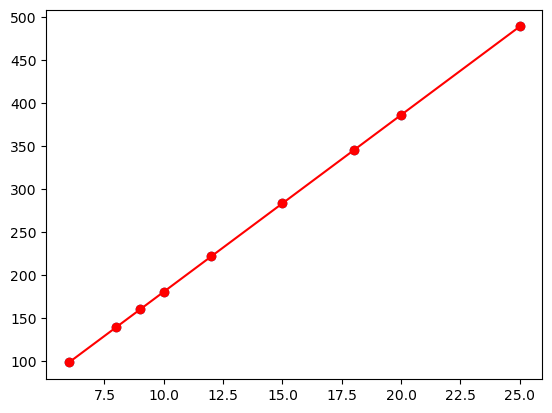

In [19]:
import matplotlib.pyplot as plt
plt.scatter(X,Y)
plt.plot(X,Y,c='r',marker='o')

In [20]:
fx(60)

np.float64(1209.795248078267)

In [21]:
fx(23)

np.float64(448.3088749126485)

In [22]:
from sklearn.linear_model import LinearRegression

In [24]:
from  scipy import stats

In [25]:
import seaborn as sns
sns

<module 'seaborn' from 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\seaborn\\__init__.py'>

In [26]:
sns.load_dataset('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [27]:
iris_df = sns.load_dataset('iris')
iris = iris_df[['petal_length','petal_width']]
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   petal_length  150 non-null    float64
 1   petal_width   150 non-null    float64
dtypes: float64(2)
memory usage: 2.5 KB


In [28]:
X = iris['petal_length']
Y = iris['petal_width']

In [30]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.4,random_state=24)


In [32]:
import numpy as np
x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(y_test).reshape(-1,1)

In [33]:
from sklearn.linear_model import LinearRegression
model_obj = LinearRegression()
model_obj.fit(x_train,y_train)
m = model_obj.intercept_
c = model_obj.coef_

In [36]:
y_pred_train = m * x_train + c
y_pre_train = model_obj.predict(x_train)

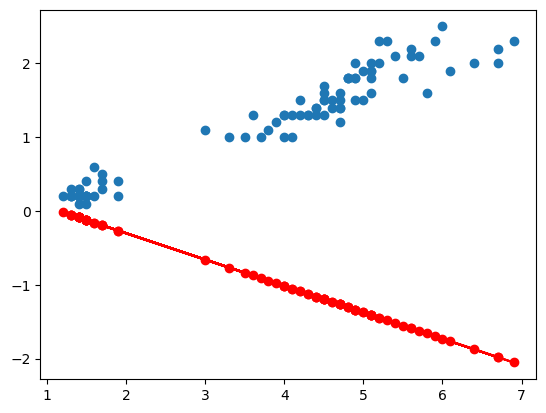

In [38]:
plt.scatter(x_train,y_train)
plt.plot(x_train,y_pred_train,color='r',marker='o')

In [ ]:
# Generate Data
# Train the model
# Evaluate model
|
# define DAG Rule
|
# PythonOperator 
#   |-> task1 -->task2  -->task3

### mydemo.py - (MLLinearRegression + DAGs )
-----------------------------------
 |__Airflow/dags/linearRegression_dag.py
